In [5]:
# Suppress warnings
import warnings 
warnings.simplefilter('ignore')

import pyrcel as pm
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def calc_eps(r,N):
    # find full-max
    maxN = np.max(N)
    maxi = np.where(N == maxN)
    maxR = r[maxi]
    
    # find half-max
    x = np.abs(N - maxN/2)
    hmi = np.concatenate((np.where(x == sorted(x)[0]), np.where(x == sorted(x)[1]))).flatten()
    hmR = r[hmi]
    hmN = np.ones(len(hmR))*maxN/2
   
    # don't plot
    # plt.figure(figsize=(8,6))
    # plt.semilogx(r,N,'ko-',alpha=0.2)
    # plt.plot(maxR,maxN,'ro')
    # plt.plot(hmR,hmN,'bo')
    # plt.semilogx(r,N,'k-',alpha=0.2)
    # plt.show()
    
    # calculate mean, fwhm (sig), and eps = sig/mu
    mu = float(maxR)
    fwhm = np.abs(hmR[1]-hmR[0])
    eps = fwhm/mu
    
    return(eps)

def eps_ev(w,Na,Ni,aer_array):
    endt = np.shape(aer_array)[0]
    eps = np.zeros(endt)
    
    for t in np.arange(endt):
        r = aer_array[t,:]
        eps[t] = calc_eps(r,Ni)
    
    plt.figure(figsize=(10,6))
    fs = 12

    plt.plot(np.arange(endt),eps,'ko-')
    
    title = "$w/N_a = {:.1e}$".format(w/Na)
    plt.title(title,fontsize=fs)
    plt.xlabel("Time, $t$ (s)",fontsize=fs)
    plt.ylabel(r"$\epsilon = \sigma / \mu$",fontsize=1.2*fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.tight_layout()
    
    savename = "./figs/eps_r_{:.1e}_w_{:.1e}_Na_{:.1e}.png".format(w/Na,w,Na)
    plt.savefig(savename,dpi=300)

def mult_eps_ev(ws,Nas,Nis,aer_arrays):
    n = len(ws)
    plt.figure(figsize=(10,6))
    fs = 12

    # loop through w/Na pairs, calculate eps and plot
    for i in np.arange(n):
        w = ws[i]
        Na = Nas[i]
        Ni = Nis[i]
        aer_array = aer_arrays[i]
        
        endt = np.shape(aer_array)[0]
        eps = np.zeros(endt)

        for t in np.arange(endt):
            r = aer_array[t,:]
            eps[t] = calc_eps(r,Ni)

        plt.plot(np.arange(endt),eps,'o-',label="{:.1e}".format(w/Na))
    
    # set plot properties
    plt.xlabel("Time, $t$ (s)",fontsize=fs)
    plt.ylabel(r"$\epsilon = \sigma / \mu$",fontsize=1.2*fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.legend(title="$w/N_a$",fontsize=fs)
    plt.tight_layout()

    # save plot
    savename = "./figs/eps_ev_all.png"
    plt.savefig(savename,dpi=300)

def mult_eps_static(ws,Nas,Nis,aer_arrays):
    n = len(ws)
    plt.figure(figsize=(10,6))
    fs = 12

    ratios = list()
    # loop through w/Na pairs, calculate eps and plot
    for i in np.arange(n):
        w = ws[i]
        Na = Nas[i]
        Ni = Nis[i]
        aer_array = aer_arrays[i]
        
        endt = np.shape(aer_array)[0]
        eps = np.zeros(endt)

        for t in np.arange(endt):
            r = aer_array[t,:]
            eps[t] = calc_eps(r,Ni)

        Deps = eps[-1] - eps[0]
        ratio = w/Na
        ratios.append(ratio)
        
        plt.semilogx(ratio, Deps,'o',label="$w={:.1e}$, $N_a={:.1e}$".format(w,Na))
    
    plt.semilogx([min(ratios),max(ratios)], [0,0], 'k--')

    # set plot properties
    plt.title("Condensational braodening/narrowing of aerosol population",fontsize=fs)
    plt.xlabel("$w/N_a$",fontsize=1.2*fs)
    plt.ylabel(r"$\Delta \epsilon = (\sigma / \mu)_f - (\sigma / \mu)_i$",fontsize=1.2*fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.legend(fontsize=0.7*fs)
    plt.tight_layout()

    # save plot
    savename = "./figs/eps_static_all.png"
    plt.savefig(savename,dpi=300)


def dist_ev(w,Na,Ni,aer_array):
    endt = np.shape(aer_array)[0]
    tlist = np.geomspace(1,endt,9,endpoint=True).astype(int)-1

    plt.figure(figsize=(10,6))
    fs = 12

    for t in tlist:
        r = aer_array[t,:]
        plt.semilogx(r, Ni*1e-6, linestyle='solid', marker='.', label="aerosol, t="+str(t))

    title = "$w/N_a = {:.1e}$".format(w/Na)
    plt.title(title,fontsize=fs)
    plt.xlabel(r"Aerosol dry radius ($\mu$m)",fontsize=fs)
    plt.ylabel(r"Aerosl number conc. (cm$^{-3})$",fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.legend(loc='upper left',fontsize=fs)
    plt.tight_layout()
    
    savename = "./figs/dist_ev_r_{:.1e}_w_{:.1e}_Na_{:.1e}.png".format(w/Na,w,Na)
    plt.savefig(savename,dpi=300)

In [7]:
P0 = 100000. # Pressure, Pa
T0 = 280.   # Temperature, K
S0 = -0.15  # Supersaturation, 1-RH (85% here)

# initial lognormal distribution variables
mu1 = 0.1 # mean
kappa1 = 0.5 # hygroscopicity

w 	 Na
1.0 	 1000.0 	 0.001
10.0 	 1000.0 	 0.01
100.0 	 1000.0 	 0.1
1.0 	 10000.0 	 0.0001
10.0 	 10000.0 	 0.001
100.0 	 10000.0 	 0.01
1.0 	 100000.0 	 1e-05
10.0 	 100000.0 	 0.0001
100.0 	 100000.0 	 0.001
1.0 	 1000000.0 	 1e-06
10.0 	 1000000.0 	 1e-05
100.0 	 1000000.0 	 0.0001
1.0 	 10000000.0 	 1e-07
10.0 	 10000000.0 	 1e-06
100.0 	 10000000.0 	 1e-05


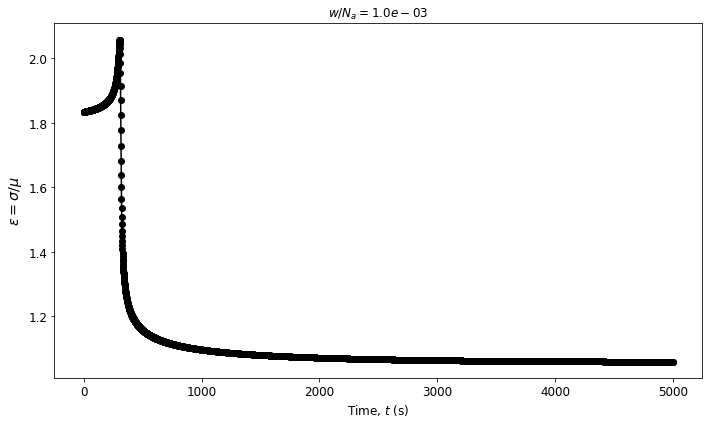

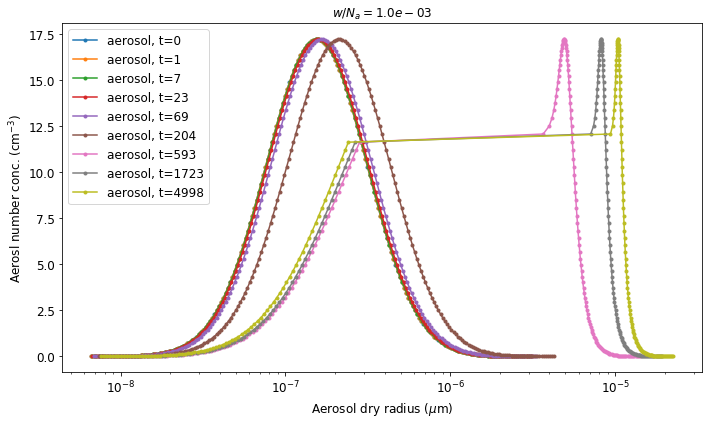

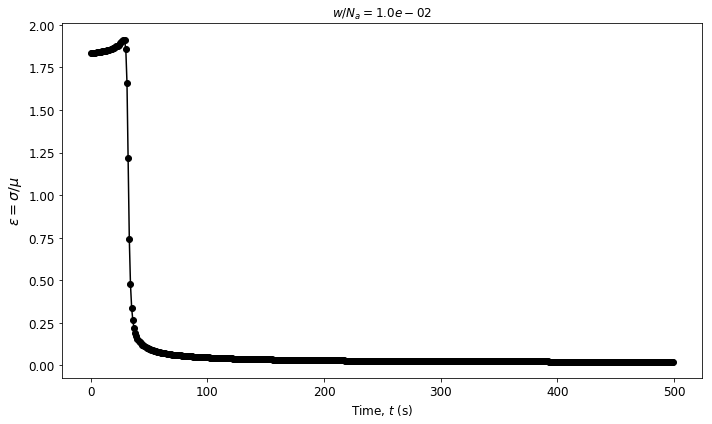

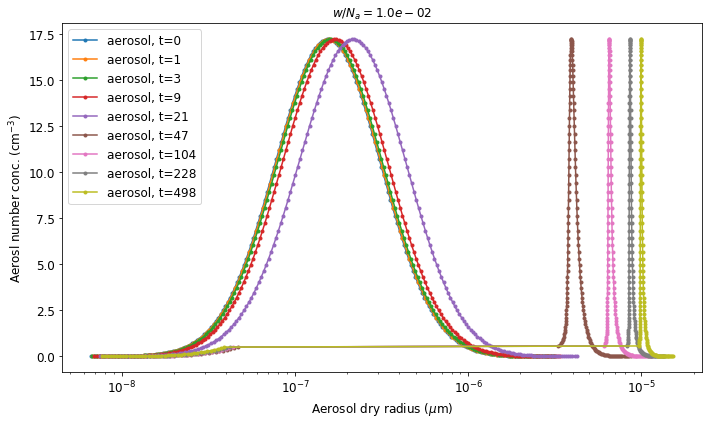

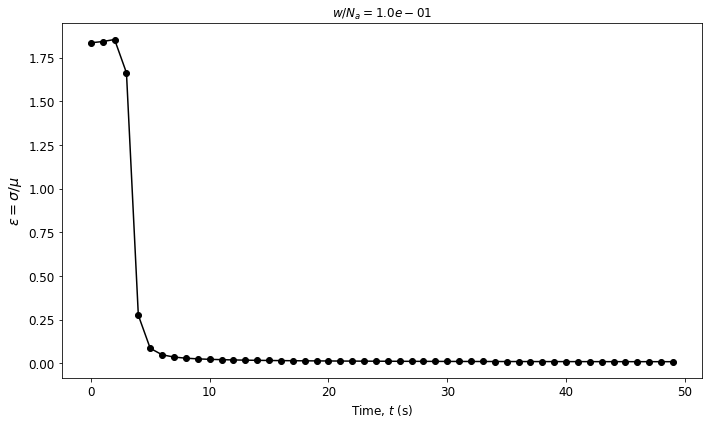

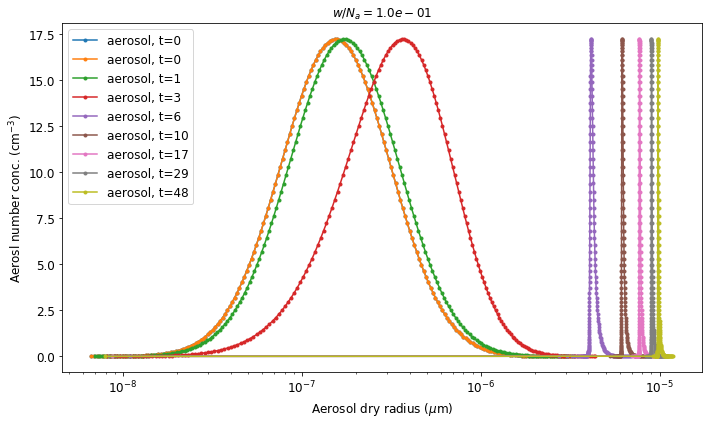

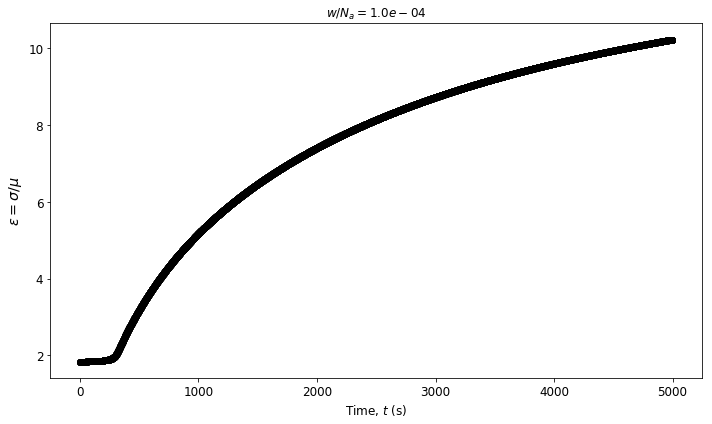

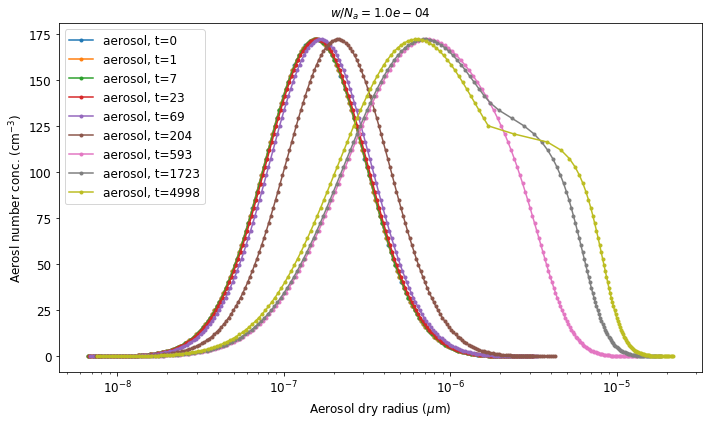

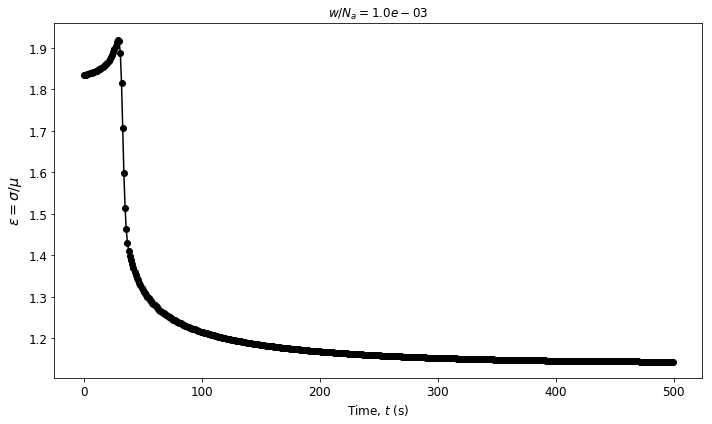

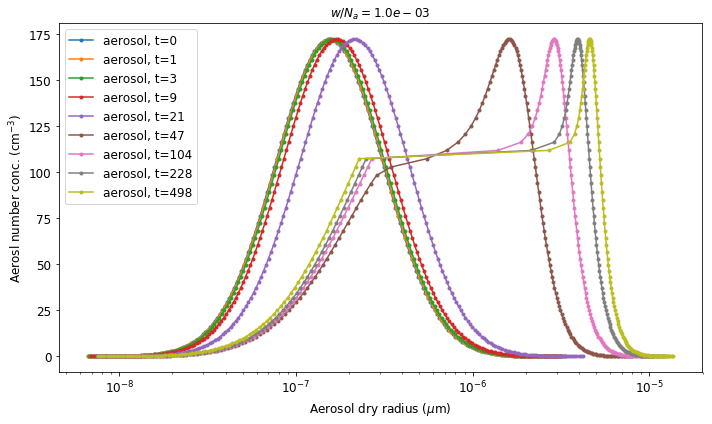

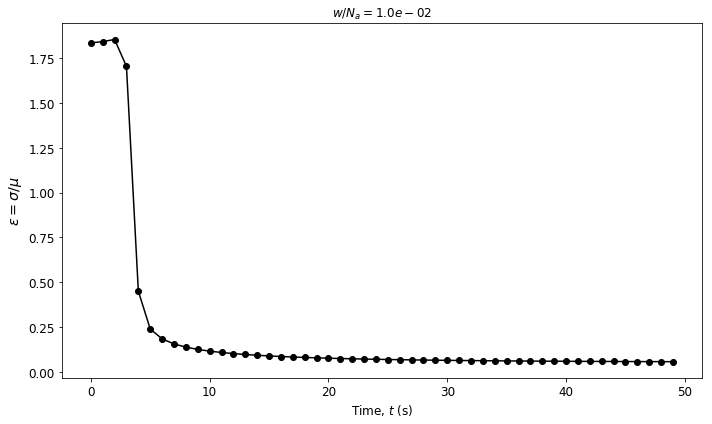

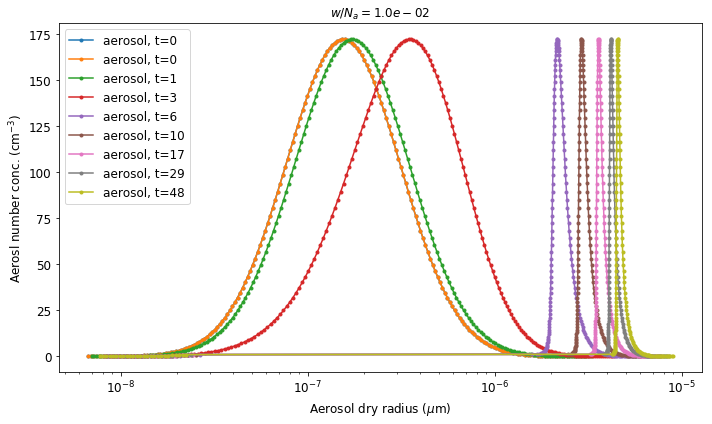

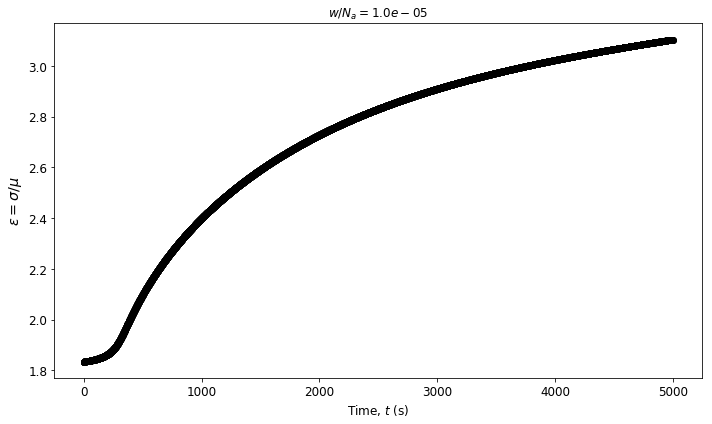

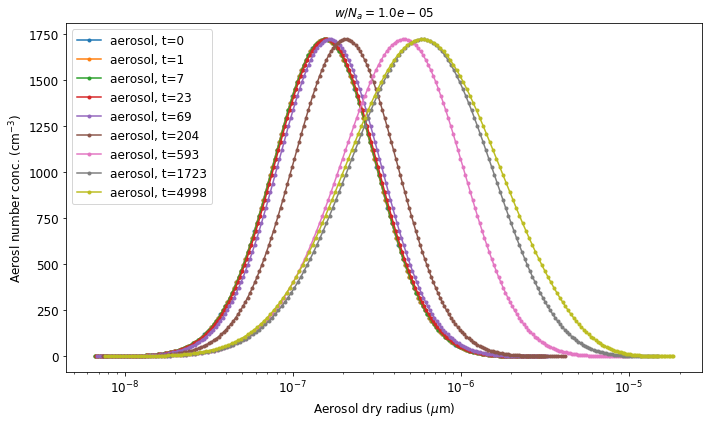

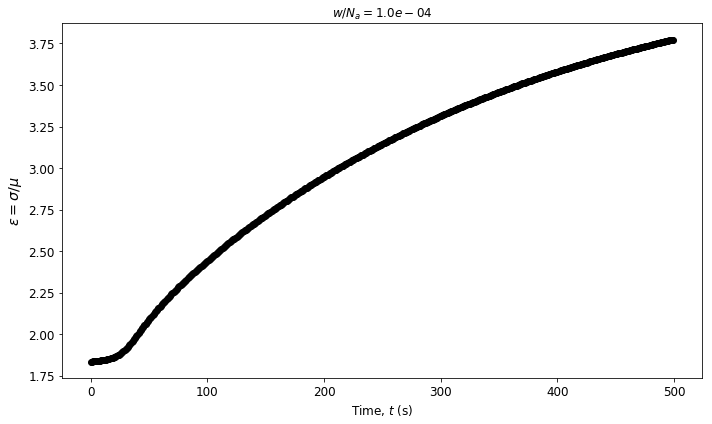

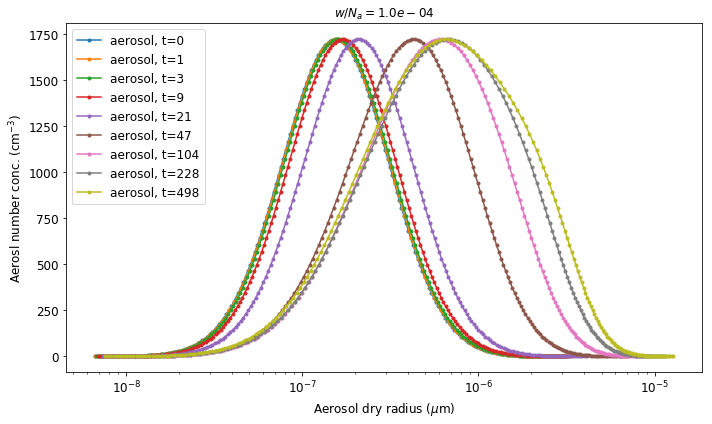

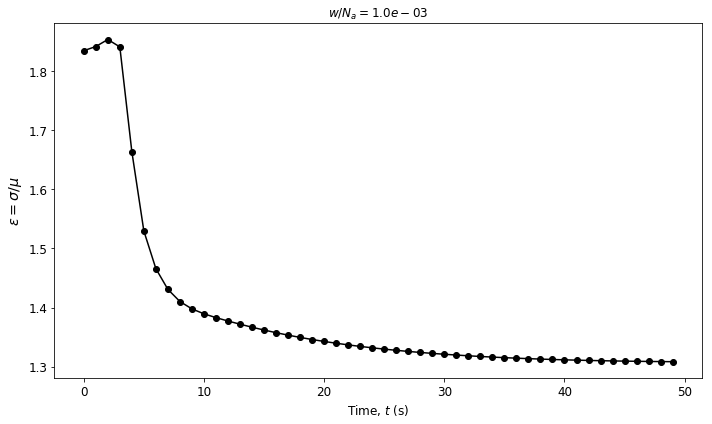

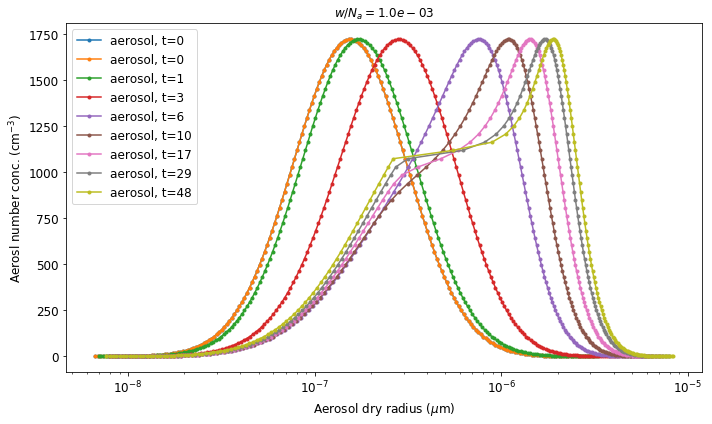

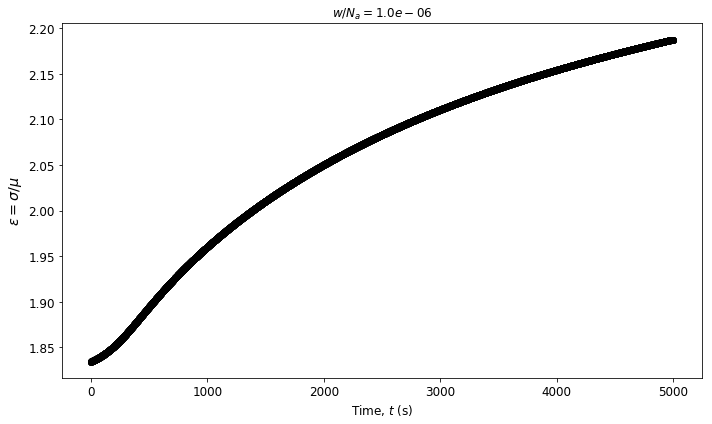

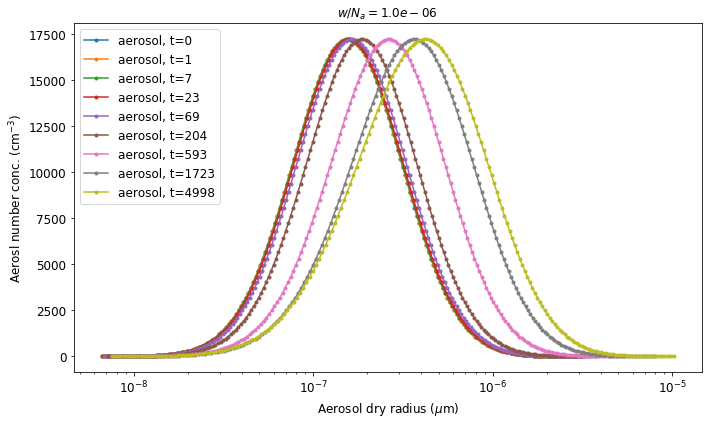

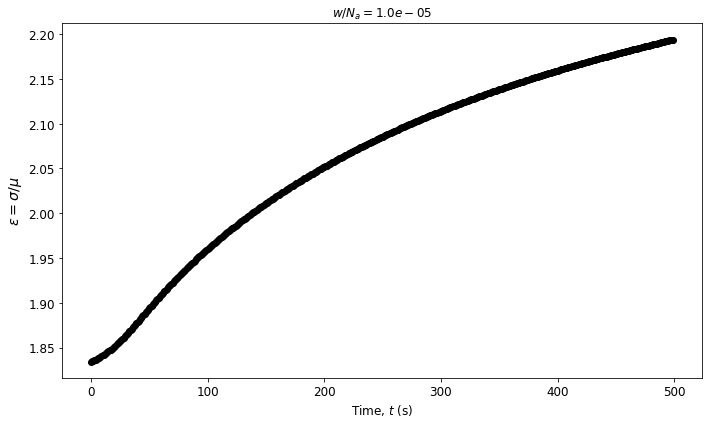

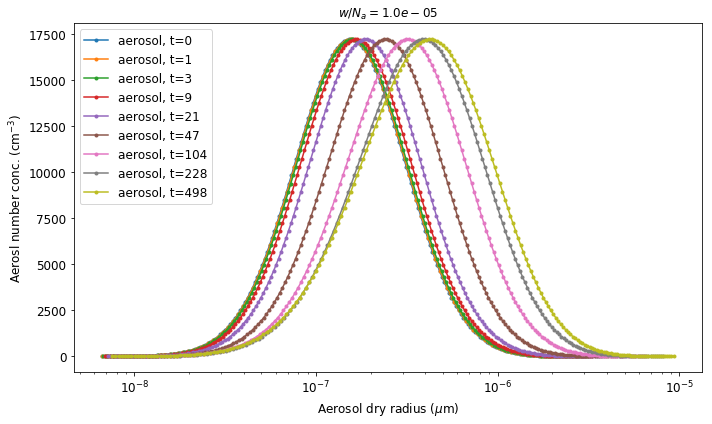

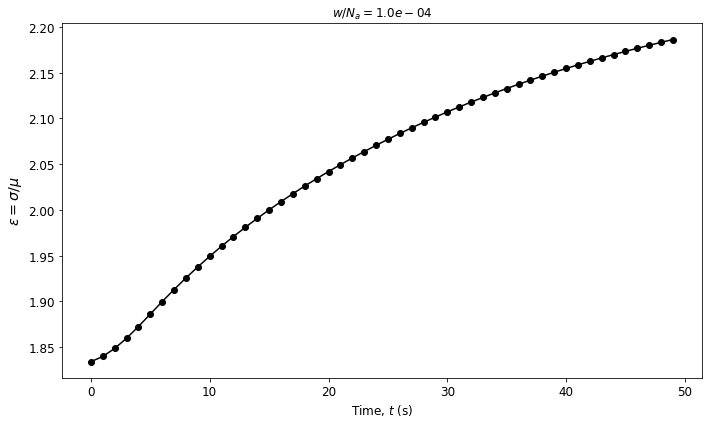

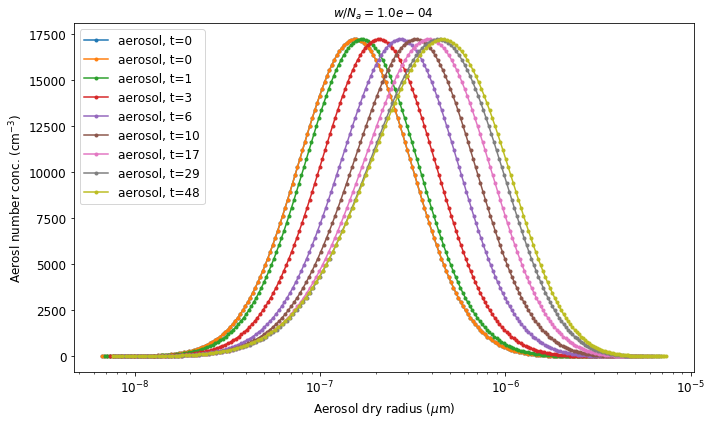

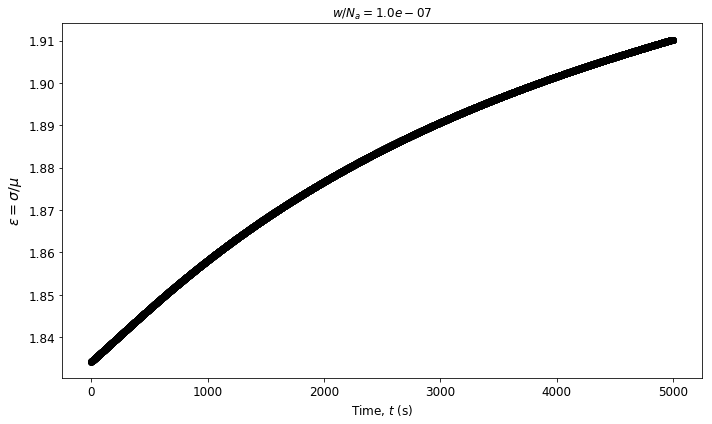

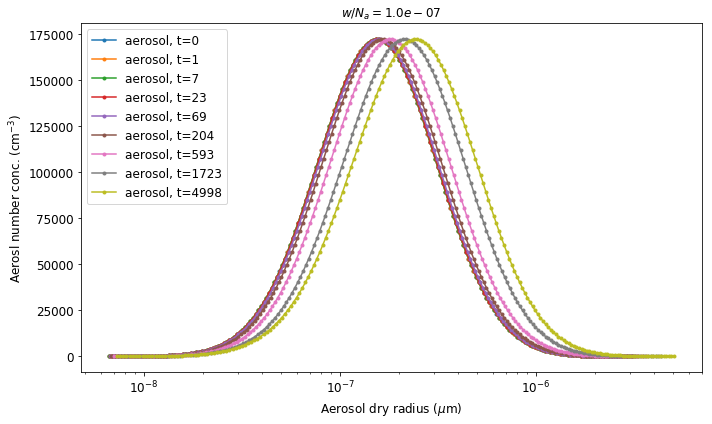

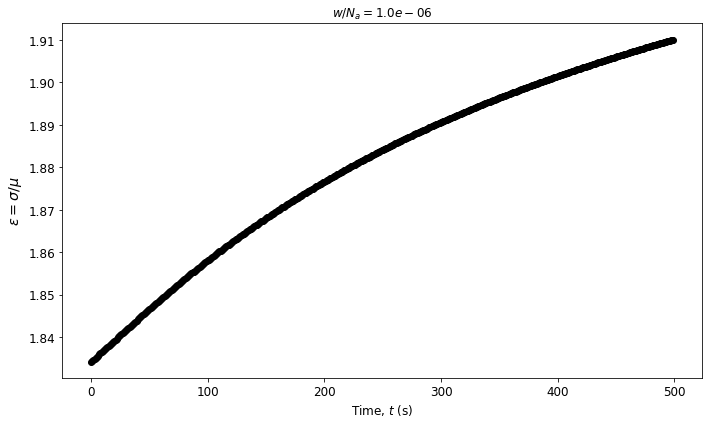

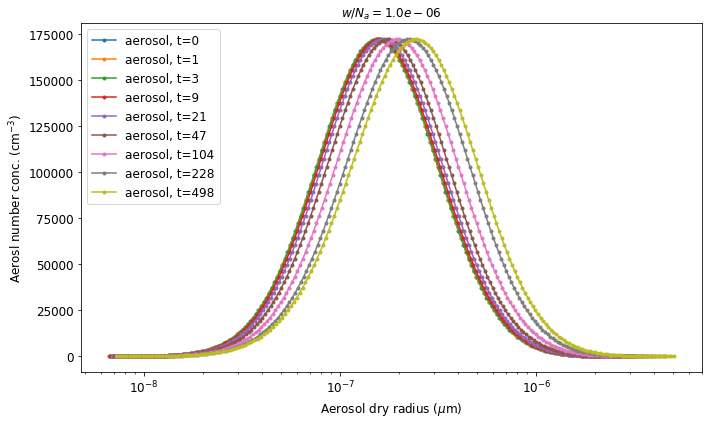

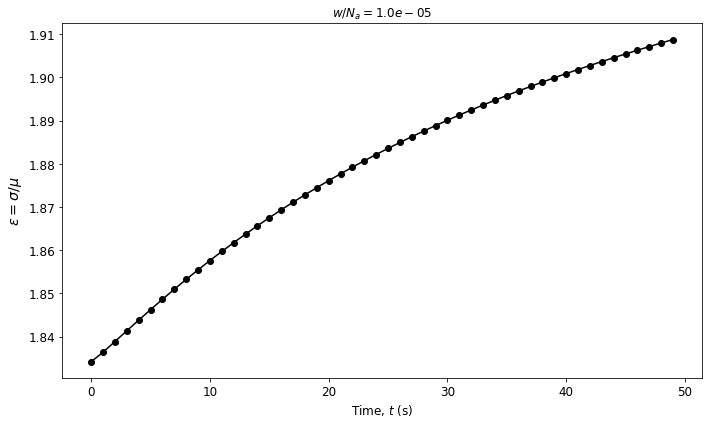

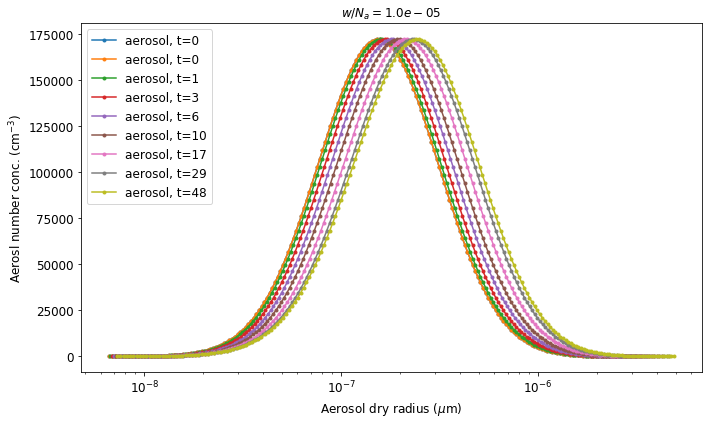

In [8]:
# variables to change to test aerosol- vs updraft-limited regime
N1list = [1e3,1e4,1e5,1e6,1e7] # total number
wlist = [1e0,1e1,1e2] # updraft speed, m/s
# N1list = [1e2,1e5] # total number
# wlist = [1e0] # updraft speed, m/s

ws = list()
N1s = list()
Nis = list()
aer_arrays = list()

print("w","\t","Na","\t",)
for i in np.arange(len(N1list)):
    N1 = N1list[i]
    for j in np.arange(len(wlist)):
        w = wlist[j]

        print(w,"\t",N1,"\t",w/N1)

        dt = 1.0 # timestep, seconds
        t_end = 5e3/w # end time, seconds... 5 km simulation 

        name = 'aer1'
        aer1 = pm.AerosolSpecies(name, pm.Lognorm(mu=mu1, sigma=2.0, N=N1), kappa=kappa1, bins=200)
        Ni = aer1.Nis
        initial_aerosols = [aer1]

        model = pm.ParcelModel(initial_aerosols, w, T0, S0, P0, console=False, accom=0.3)
        parcel_trace, aerosol_traces = model.run(t_end, dt, solver='cvode')
        aer_array = aerosol_traces[name].values

        ws.append(w)
        N1s.append(N1)
        Nis.append(Ni)
        aer_arrays.append(aer_array)

        eps_ev(w,N1,Ni,aer_array)
        dist_ev(w,N1,Ni,aer_array)

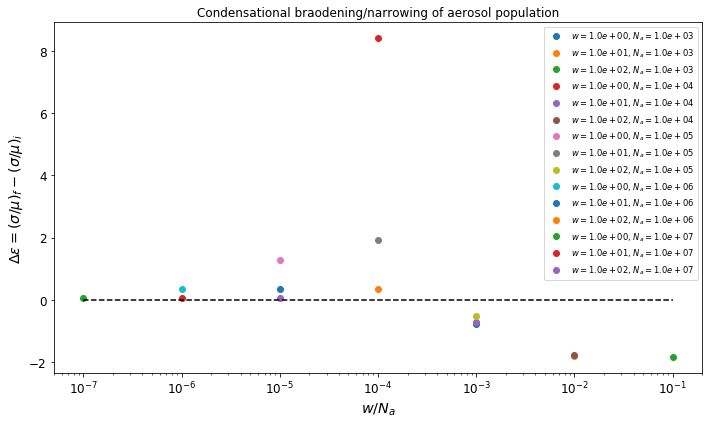

In [20]:
mult_eps_static(ws,N1s,Nis,aer_arrays)